## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [48]:
# import statements 
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

### Part 1 

In [49]:
# Question 1 
car = pd.read_csv('./data/car_data.csv')
print(car.columns)
car.head()

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [50]:
car.shape

(1000, 5)

In [51]:
#Question 2 
car.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


### Part 2

In [52]:
car['Gender'].value_counts()

Gender
Female    516
Male      484
Name: count, dtype: int64

In [53]:
car['g'] = 0
car.loc[car['Gender']=='Female', 'g'] = 1 
car['g'].value_counts()

g
1    516
0    484
Name: count, dtype: int64

In [54]:
X = car.loc[:,['Age','AnnualSalary']]
y = car['Purchased']

In [55]:
X

,Age,AnnualSalary
0,35,20000
1,40,43500
2,49,74000
3,40,107500
4,25,79000
...,...,...
995,38,59000
996,47,23500
997,28,138500
998,48,134000


### Part 3

In [56]:
def maxmin(x): # Maxmin normalization function
    x = (x-min(x))/(max(x)-min(x))
    return x
X = X.apply(maxmin)
X.describe()

,Age,AnnualSalary
count,1000.000000,1000.000000
mean,0.491244,0.419556
std,0.237935,0.250824
min,0.000000,0.000000
25%,0.311111,0.228182
50%,0.488889,0.414545
75%,0.666667,0.545455
max,1.000000,1.000000


### Part 4 

In [57]:
# splitting sample into 80 train and 20 test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)

### Part 5 

[ 6 16]


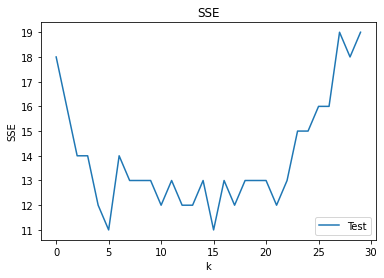

In [58]:
# finding the optimal k to use 

k_bar = 30 # how do i know what k_bar should be? 
k_grid = np.arange(1,k_bar) 
SSE = np.zeros(k_bar) 
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KNeighborsClassifier(n_neighbors=k+1)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum((y_test-y_hat)**2)
    
SSE_min = np.min(SSE) 
min_index = np.where(SSE==SSE_min) 
k_star = k_grid[min_index] 
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test') 
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title("SSE")
plt.show()


Based on this graph, the optimal k seems to be about 5

### Part 6

In [59]:
# now do a confusion matrix by cross tabulating the 
# predicted outcomes against the actual outcomes 

model = KNeighborsClassifier(n_neighbors=5)
fitted_model = model.fit(X_train, y_train)
y_hat = fitted_model.predict(X_test)

pd.crosstab(y_test, y_hat)

col_0,0,1
Purchased,,
0,118,7
1,5,70


Most of the cases are predicted correctly. There are 7 times when there is a false classification of the 0's as 1's, and 5 times where the 1's are classified as 0's. Overall it is accurate 95% of the time. 

### Part 7 

In [60]:
# resplitting the data 

vars1 = ['Age', 'AnnualSalary', 'Gender']
X = car.loc[:, vars1]
y = car['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)

# use selected k now 
model = KNeighborsClassifier(n_neighbors=5)
fitted_model=model.fit(X_train.drop('Gender', axis=1),y_train)
y_hat=fitted_model.predict(X_test.drop('Gender', axis=1))

y_hat_M = y_hat[ X_test['Gender'] == 'Male']
y_hat_F = y_hat[ X_test['Gender'] == 'Female']
y_M = y_test[ X_test['Gender'] == 'Male']
y_F = y_test[ X_test['Gender'] == 'Female']

In [61]:
pd.crosstab(y_F, y_hat_F)

col_0,0,1
Purchased,,
0,56,11
1,5,33


In [62]:
pd.crosstab(y_M, y_hat_M)

col_0,0,1
Purchased,,
0,46,6
1,10,33


For men, there it is accurate 75/96 times, which is 78.125%. For women it is accurate 84/104 81.73% of the time. The model tends to do better predicted what a female customer will do as opposed to a male customer. 

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [63]:
# import statements here 
import pandas as pd 
import numpy as np 
import seaborn as sns
import warnings
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans # Import kmc
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [64]:
warnings.filterwarnings("ignore")

### Part 1 

In [65]:
# load the data 
cars = pd.read_csv('./data/USA_cars_datasets.csv')

In [66]:
# Question 1: 
car = cars[['price', 'year', 'mileage']]

price_nas = car['price'].isna().sum()
year_nas = car['year'].isna().sum()
mileage_nas = car['mileage'].isna().sum()

print("Price nas: ", price_nas)
print("Year nas: ", year_nas)
print("Mileage nas: ", mileage_nas)

car.head()

Price nas:  0
Year nas:  0
Mileage nas:  0


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [67]:
# Question 2
car.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


There are no NA's to handle in terms of the variables that we are concerned with. 

In [68]:
vars = ['year','mileage']
X = car.loc[:,vars]
y = car['price']

### Part 2 

In [69]:
def maxmin(x): # Maxmin normalization function
    x = (x-min(x))/(max(x)-min(x))
    return x
X = X.apply(maxmin) # Apply maxmin normalization function to all columns of X
X.describe()

,year,mileage
count,2499.000000,2499.000000
mean,0.930091,0.051377
std,0.073248,0.058654
min,0.000000,0.000000
25%,0.914894,0.021088
50%,0.957447,0.034742
75%,0.978723,0.062354
max,1.000000,1.000000


### Part 3 

In [70]:
# Question 3: splitting the sample 
# splitting sample into 80 train and 20 test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

## Part 4 

In [71]:
# Question 4, use knn to predict for the test set 
# test set: k=3,10,25,100,300
# find SSE for each k 
# make scatterplot showing test value against predicted value 
# what are the patterns as k increases 

k_values = [3, 10, 25, 50, 100, 300]
results = pd.DataFrame(columns=['k', 'MSE'])
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train[['year', 'mileage']], y_train)
    
    y_pred = knn.predict(X_test[['year', 'mileage']])
    
    mse = mean_squared_error(y_test, y_pred)
    
    results = pd.concat([results, pd.DataFrame({'k': [k], 'MSE': [mse]})], ignore_index=True)

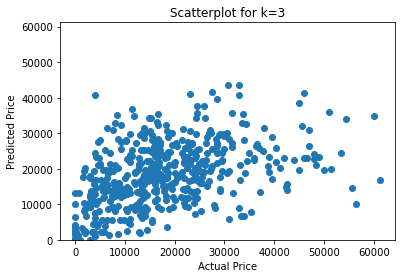

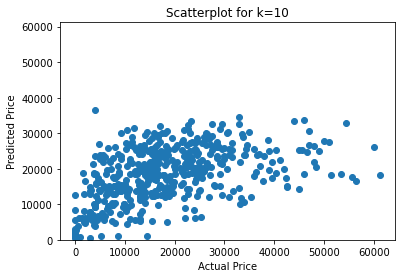

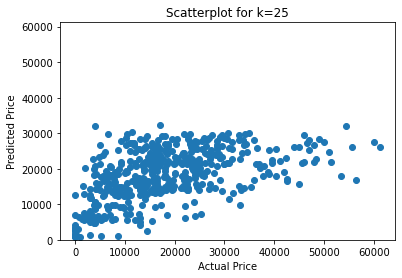

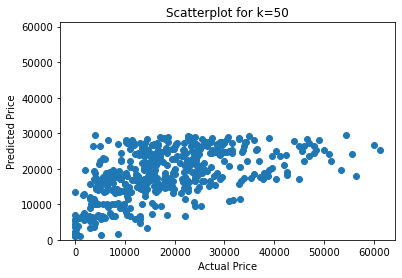

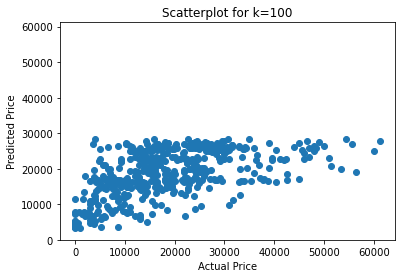

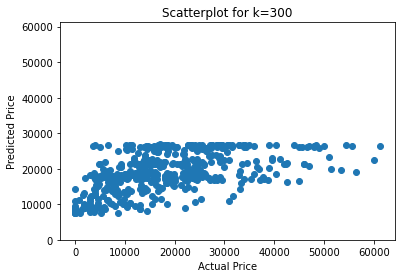

In [72]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train[['year', 'mileage']], y_train)
    
    y_pred = knn.predict(X_test[['year', 'mileage']])
    
    plt.scatter(y_test, y_pred)
    
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'Scatterplot for k={k}')
    
    # Set a fixed y-axis range to ensure consistency
    plt.ylim([y_test.min(), y_test.max()])
    
    plt.show()
    
# hold axis constant to get better idea 
# take min max of actual values and make that the axis for all plots 


I notice that as k gets very large the data seems to get less scattered and more linear. The standard deviation seems to be the largest when k=3 by looking at the graph. There is a trend where when k is increasing the graph is platueing sharply at 30000.  

### Part 5

[77]


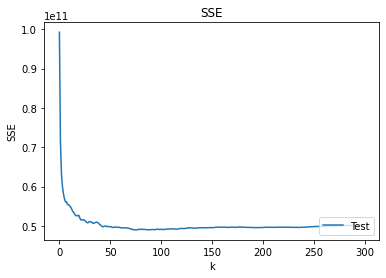

In [73]:
# pick the best k in general, not the best k from the options !! 
k_bar = 300 
k_grid = np.arange(1,k_bar) 
SSE_train = np.zeros(k_bar) 
SSE_test = np.zeros(k_bar)
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

    
SSE_min = np.min(SSE_test) 
min_index = np.where(SSE_test==SSE_min) 
k_star = k_grid[min_index] 
print(k_star)

plt.plot(np.arange(0,k_bar),SSE_test,label='Test') 
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title("SSE")
plt.show()

The optimal k value is 77. 

#### Part 6 

Underfitting occurs when a model is too simple to reliably explain what we are seeing (high bias) and overfitting occurs when the model is too complex (high variance. This relates to the different values of k that we tested. 

It is easiest to see that in the largest value, k=300 there is a lot of overfitting occuring because of how varied the graph is. In the smaller values of k the underfitting is less obvious. For the very small values such as 3 and 10 those values are too small and the graph is not able to make a linear relationship because so many datapoints are clustered around so few k values. There is alot underfitting occuring in the scatter plots when k=25 and 50. 

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [74]:
# all import statements 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans # Import kmc
import matplotlib.pyplot as plt

### Part 1 

In [75]:
# Question 1 
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df 


df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

### Part 2 

<AxesSubplot:xlabel='x1', ylabel='x2'>

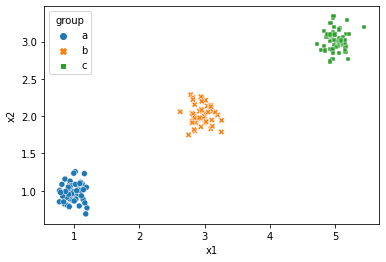

In [76]:
# Quetion 2, make scatterplot 

sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<AxesSubplot:xlabel='x1', ylabel='x2'>

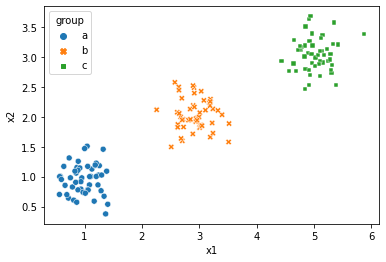

In [77]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<AxesSubplot:xlabel='x1', ylabel='x2'>

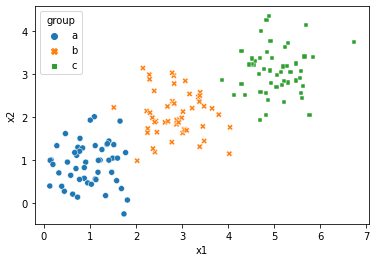

In [78]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<AxesSubplot:xlabel='x1', ylabel='x2'>

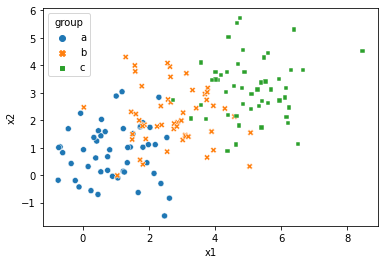

In [79]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<AxesSubplot:xlabel='x1', ylabel='x2'>

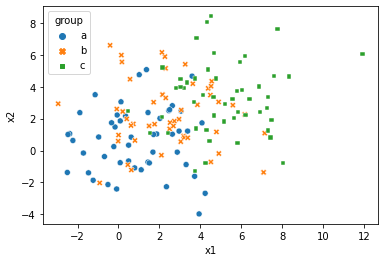

In [80]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

It is clear to see here that the clusters are spreading out more and they are enroaching on the other groups as the noise is increasing. In the final plot there is absolutely no way to tell which cluster the points belong to. 

### Part 3

In [81]:
# note: there are many warnings signs appearing, but after the warning signs are the graph


In [82]:
# creating a scree plot for each dataset. 
# how does the level of noise affect the scree plot 
#, is there an elbow in each one to help pick a k? 


def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

def scree(data): 
    X = data.loc[ : , ['x1','x2'] ]
    X = X.apply(maxmin) 
    # Create a scree plot:
    k_bar = 15 # maximum k would be total num of observations, if you do you get sum scquared of 0. 
    # make a plot w large number and see how that looks then scale back etc 
    k_grid = np.arange(1,k_bar+1) 
    SSE = np.zeros(k_bar) 
    for k in range(k_bar):
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=100) 
        model = model.fit(X) # Fit the model
        SSE[k] = model.inertia_ 
    #scree_plot, axes = plt.subplots()
    sns.lineplot(x=k_grid, y=SSE)
    #axes.set_ylim(0,35)

In [83]:
# Define and call the scree plot function for each dataset
def plot_scree(df, title):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        scree(df)  
    plt.title(title) 
    plt.show()  # Display the plot

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5ce3510430>
Traceback (most recent call last):
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().spl

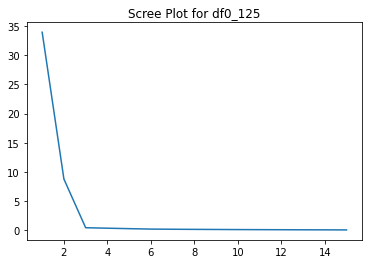

In [84]:
plot_scree(df0_125, "Scree Plot for df0_125")

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5ce347a310>
Traceback (most recent call last):
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().spl

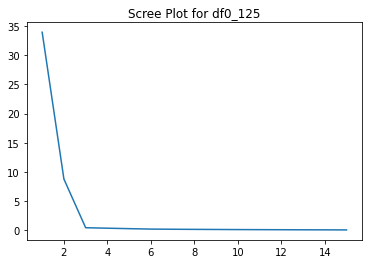

In [85]:
try: 
    plot_scree(df0_125, "Scree Plot for df0_125")
except AttributeError:
    pass  # Do nothing if there's an AttributeError

The elbow is at k=3 and is very prominent 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5ce9b00a60>
Traceback (most recent call last):
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().spl

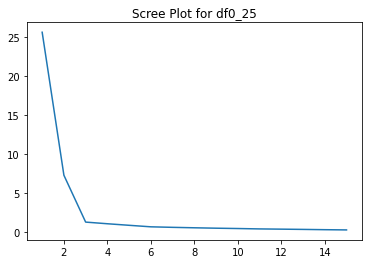

In [86]:
plot_scree(df0_25, "Scree Plot for df0_25")

The still prominent elbow is at k=3

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5ce346e820>
Traceback (most recent call last):
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().spl

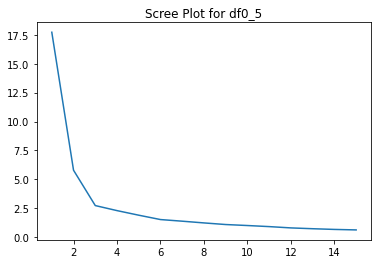

In [87]:
plot_scree(df0_5, "Scree Plot for df0_5")

The elbow is at k=3 still

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5ce3249a60>
Traceback (most recent call last):
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().spl

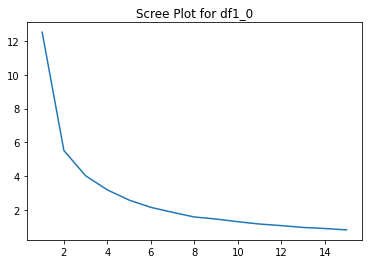

In [88]:
plot_scree(df1_0, "Scree Plot for df1_0")

It does not look properly prominent like the elbows from before, but there does seem to be an elbow at k=2 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5ce353b4c0>
Traceback (most recent call last):
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().spl

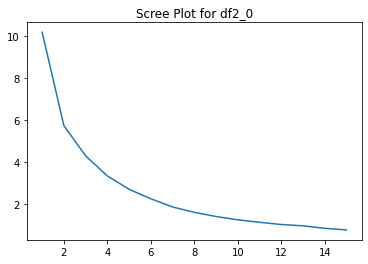

In [89]:
plot_scree(df2_0, "Scree Plot for df2_0")

The location of the elbow is no longer prominent or obvious. 

In [90]:
# Question 4:

The optimal k values occurs at the 'elbow' in a scree plot which is where the distortion stops decreasing so rapidly. You can capture a large drop in the SSE (Sum of Squared Error). As the noise increases, the groups disperse until they are visually different. In. this case the clustering is hidden as the noise increased too much. When there are not clusters and the data is just a varied scatterplot, there will not be a distinct elbow.  

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which? 

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?